In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
np.random.seed(42)
n=100
data ={

    'Age':np.random.randint(18,70,n),
    'Gender':np.random.choice(['M','F'],n),
    'Annual_Income':np.random.normal(60000,15000,n).astype(int),
    'Purchase_Amount': np.random.normal(300,100,n).astype(int),
    'Customer_Segment':np.random.choice(['Low','Medium','High'],n, p=[0.3,0.5,0.2]),
    'Visits_ Per_Month':np.random.poisson(3,n),
    'Satisfaction_Score':np.random.randint(1,11,n) #1 to 10 scale


}

df=pd.DataFrame(data)
#Introduvce missing values in 'Annual_INCOME'
missing_indices=np.random.choice(df.index,size=50, replace=False)
df.loc[missing_indices, 'Annual_Income']=np.nan
#introduce outliers in 'Purchase_Amount'
outlier_indices=np.random.choice(df.index, size=10, replace=False)
df.loc[outlier_indices, 'Purchase_Amount']=df['Purchase_Amount']*5

print(df)

    Age Gendert  Annual_Income  Purchase_Amount Customer_Segment  \
0    56       M        74439.0              578              Low   
1    69       M        56854.0              296           Medium   
2    46       M            NaN              298           Medium   
3    32       M            NaN              319           Medium   
4    60       M            NaN              360           Medium   
..  ...     ...            ...              ...              ...   
95   42       F        47289.0              406              Low   
96   62       F        80466.0              233           Medium   
97   58       F            NaN              213           Medium   
98   46       F            NaN              245             High   
99   32       F        67553.0              865             High   

    Visits_ Per_Month  Satisfaction_Score  
0                   2                   9  
1                   4                   7  
2                   1                   3  
3      

In [18]:
df.head(10)

,Age,Gendert,Annual_Income,Purchase_Amount,Customer_Segment,Visits_ Per_Month,Satisfaction_Score
0,56,M,74439.0,578,Low,2,9
1,69,M,56854.0,296,Medium,4,7
2,46,M,NaN,298,Medium,1,3
3,32,M,NaN,319,Medium,7,8
4,60,M,NaN,360,Medium,1,7
5,25,F,NaN,265,Medium,2,8
6,38,M,NaN,360,Medium,2,6
7,56,F,NaN,105,Low,2,9
8,36,F,46945.0,333,Medium,0,5
9,40,F,52400.0,305,Medium,3,3


In [ ]:
average_purchase = df['Purchase_Amount'].mean()
print("Average Purchase Amount:", average_purchase)

   Age Gendert  Annual_Income  Purchase_Amount Customer_Segment  \
0   56       M        74439.0              578              Low   
1   69       M        56854.0              296           Medium   
2   46       M            NaN              298           Medium   
3   32       M            NaN              319           Medium   
4   60       M            NaN              360           Medium   
5   25       F            NaN              265           Medium   
6   38       M            NaN              360           Medium   
7   56       F            NaN              105              Low   
8   36       F        46945.0              333           Medium   
9   40       F        52400.0              305           Medium   

   Visits_ Per_Month  Satisfaction_Score  
0                  2                   9  
1                  4                   7  
2                  1                   3  
3                  7                   8  
4                  1                   7  
5   

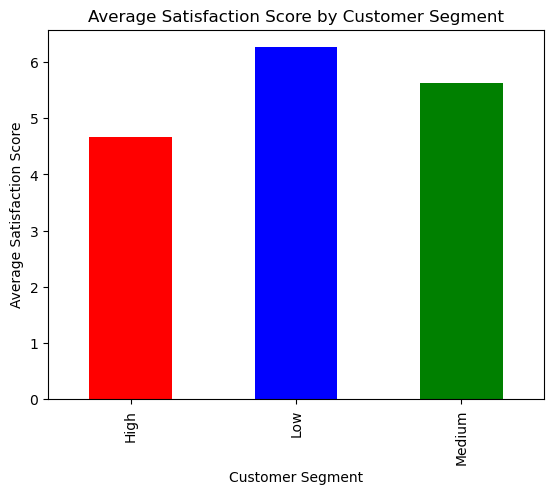

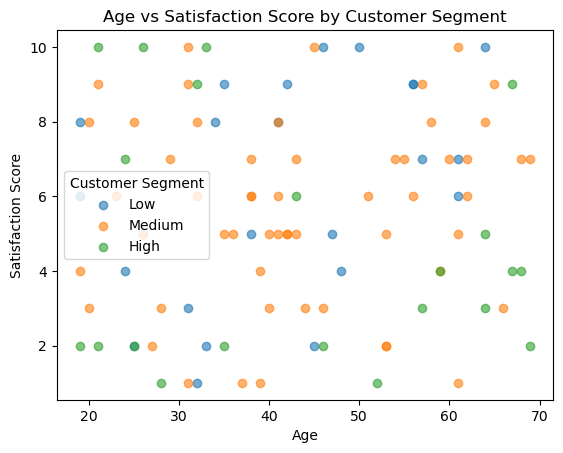

In [29]:
avg_satisfaction = df.groupby('Customer_Segment')['Satisfaction_Score'].mean()

plt.figure()
avg_satisfaction.plot(kind='bar', color=['red','blue','green'])
plt.xlabel('Customer Segment')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Customer Segment')
plt.show()
plt.figure()

segments = df['Customer_Segment'].unique()
for segment in segments:
    subset = df[df['Customer_Segment'] == segment]
    plt.scatter(
        subset['Age'],
        subset['Satisfaction_Score'],
        label=segment,
        alpha=0.6
    )

plt.xlabel('Age')
plt.ylabel('Satisfaction Score')
plt.title('Age vs Satisfaction Score by Customer Segment')
plt.legend(title='Customer Segment')
plt.show()

In [30]:
print(df.isnull().sum())

Age                    0
Gendert                0
Annual_Income         50
Purchase_Amount        0
Customer_Segment       0
Visits_ Per_Month      0
Satisfaction_Score     0
dtype: int64


In [32]:
mean=df["Annual_Income"].mean()#find the mean of the missing value
df["Annual_Income"].fillna(mean,inplace=True)# replacing it
print(df.isnull().sum())

Age                   0
Gendert               0
Annual_Income         0
Purchase_Amount       0
Customer_Segment      0
Visits_ Per_Month     0
Satisfaction_Score    0
dtype: int64


C:\Users\LabStudent\AppData\Local\Temp\ipykernel_6864\3087595120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Annual_Income"].fillna(mean,inplace=True)# replacing it
